# NIPS 2018: AI for Prosthetics Competition: Interaction Monitor

Author: [Seungjae Ryan Lee](https://github.com/seungjaeryanlee)

This is a Jupyter Notebook that allows participants of the [NIPS 2018: AI for Prosthetics Competition](http://osim-rl.stanford.edu) to monitor the interactions between the environment and the agent.

In [1]:
from helper.baselines import *
from agents import *

Using TensorFlow backend.


In [2]:
from osim.env import ProstheticsEnv
from IPython.display import clear_output
from matplotlib import pyplot as plt
import math
%matplotlib inline

## Agent

For simplicity, in this example, we will monitor the `FixedActionAgent` in `helpers.baselines`. You can replace it with any agent that has a `.act()` function.

In [3]:
env = ProstheticsEnv(visualize=False)
agent = FixedActionAgent(env)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


## Choosing What to Monitor

You can decide which numbers to monitor. The `monitor_specs` is a list of dictionaries with each dictionary containing a `title` of the plot and a `function` that processes the interaction. The function is given an `experience` dictionary which contains an observation, reward, cumulative reward, and the action for some time step. The function must return the number to monitor.

The example below monitors the $x, y, z$ positions of the pelvis, the reward, the cumulative reward, and the force applied by the agent to muscle 0.

In [4]:
monitor_specs = [
    {
        'title': 'Pelvis x',
        'function': lambda exp: exp['obs']['body_pos']['pelvis'][0],
    },
    {
        'title': 'Pelvis y',
        'function': lambda exp: exp['obs']['body_pos']['pelvis'][1],
    },
    {
        'title': 'Pelvis z',
        'function': lambda exp: exp['obs']['body_pos']['pelvis'][2],
    },
    {
        'title': 'Reward',
        'function': lambda exp: exp['rew'],
    },
    {
        'title': 'Cumulative Reward',
        'function': lambda exp: exp['cumul_rew'],
    },
    {
        'title': 'Force to Muscle 0',
        'function': lambda exp: exp['act'][0],
    },
]

## Monitoring

The `monitor` function runs the agent through one episode and redraws the plots for each step. You can specify the `agent` to monitor, the `monitor_specs`, and whether to `visualize` the interaction.

In [5]:
def monitor(agent, specs, visualize=True):
    env = ProstheticsEnv(visualize=visualize)
    obs = env.reset(project=False)
    experiences = [
        {
            'obs': obs,
            'rew': 0,
            'cumul_rew': 0,
            'act': [0] * 19,
        }
    ]

    done = False
    while not done:
        action = agent.act(obs)
        obs, rew, done, info = env.step(action, project=False)
        experiences.append({
            'obs': obs, 
            'rew': rew, 
            'cumul_rew': experiences[-1]['cumul_rew'] + rew,
            'act': action,
        })
        _plot(experiences, specs)

In [6]:
def _plot(experiences, specs):
    clear_output(True)
    ncols = 3
    nrows = math.ceil(len(specs) / ncols)
    plt.figure(figsize=(20, 6*nrows))
    for i, spec in enumerate(specs):
        plt.subplot(nrows, ncols, i+1)
        plt.title(spec['title'])
        plt.plot([spec['function'](exp) for exp in experiences])
    plt.tight_layout()
    plt.show()

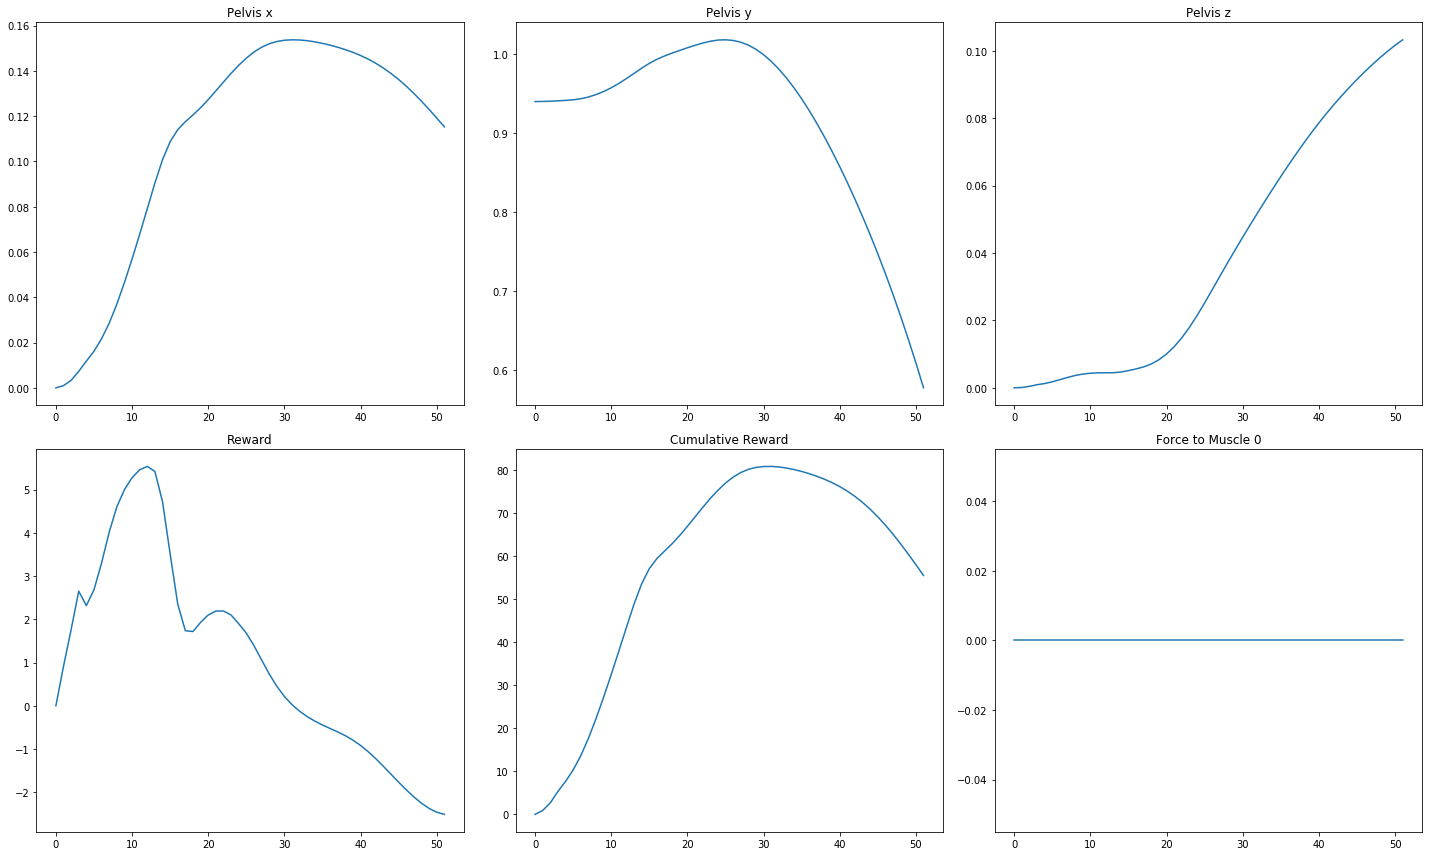

In [7]:
monitor(agent, monitor_specs, visualize=False)